## Project Results
---
The following is a summary of model selection and results as run via the 03_do_classification.py script.

### Overview
---
Anxiety and depression are common and debilitating mental disorders that can cause significant impairment in daily functioning, physical health, and cognition. Understanding how symptoms of either clinical disorder are expressed can aid in early identification of development, progress of AI-aided virtual therapy platforms and chatbots, and general clarification of the linguistic differences between highly comorbid manifestation of anxiety and depression.

Acknowledgment of anxiety and depression symptoms are often verbalized on social media platforms such as Twitter. This project looks to utilize natural language processing (NLP) to evaluate how both anxiety and depression are differentially expressed on Twitter.  

For a deeper look at project data sources and layout, refer to project README.ipynb.

---

Load initial libraries...

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import re
import unicodedata
import random
import sys 
import os
sys.path.append(os.path.abspath("/Users/emilyburns/Documents/Data_Science/projects/twitter_nlp/code/script/functions"))
from funs_do_classification import *

In [2]:
# hiding warnings
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [3]:
random.seed(101)

Next, import the clean data...

In [4]:
clean_df = pd.read_csv('/Users/emilyburns/Documents/Data_Science/projects/twitter_nlp/data/processed_data/mi_twitter_data_clean.csv')

In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_Created     98666 non-null  object
 1   Tweet_ID         98666 non-null  int64 
 2   Full_Text        98666 non-null  object
 3   Entities         98666 non-null  object
 4   Count_Retweets   98666 non-null  int64 
 5   Count_Favorites  98666 non-null  int64 
 6   MI_Type          98666 non-null  int64 
 7   Clean_Text       98665 non-null  object
 8   Text_Length      98666 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.8+ MB


In [6]:
clean_df['Clean_Text'] = clean_df['Clean_Text'].astype('|S')

Before moving onto modeling, a few additional stopwords are added to the ones provided by sklearn. 

In [7]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = text.ENGLISH_STOP_WORDS.union('thing', 'la', 'd', 'gon', 'na', 'wa', 'dont' 
                                           'padukone', 'ha', 'le', 'u', 'youre', 'im', 'thats', "ive")

The text corpus is then split into train and test subsets prior to modeling as well.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = clean_df['Clean_Text']
y = clean_df['MI_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [10]:
print("Number of tweets in training data: {}".format(len(X_train))) 
print("Samples per class (training): {}".format(np.bincount(y_train)))
print("Number of tweets in test data: {}".format(len(X_test))) 
print("Samples per class (test): {}".format(np.bincount(y_test)))

Number of tweets in training data: 69066
Samples per class (training): [34054 35012]
Number of tweets in test data: 29600
Samples per class (test): [14612 14988]




### Naive Bayes Model
---
The first model we'll run is a Multinomial Naive Bayes classification algorithm. A pipeline coupled with a grid search will vectorize and transform the text prior to fitting it to the multinomial naive bayes algorithm with an array of parameters.


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import text 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import mglearn

In [50]:
nb_pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer = LemmaTokenizer(), 
                             min_df = 5, stop_words = stop_words)),
    ('tfid', TfidfTransformer()),
    ('clf', MultinomialNB(fit_prior = False))
])

nb_param_grid = {
    "clf__alpha": [0.01, 0.1, 0.5, 1.0, 10.0],
    "vect__ngram_range": [(1, 1), (2, 2), (3, 3)]}

nb_grid = GridSearchCV(nb_pipeline, nb_param_grid, cv = 5, n_jobs=-1)

In [52]:
TrainModel(nb_grid, X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Best estimator:
Pipeline(steps=[('vect',
                 CountVectorizer(min_df=5, ngram_range=(2, 2),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyh

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,25.655425,0.958286,5.828916,0.085255,0.01,"(1, 1)","{'clf__alpha': 0.01, 'vect__ngram_range': (1, 1)}",0.827494,0.831753,0.830305,0.830956,0.830305,0.830162,0.001437,10
1,25.737915,1.041525,6.150442,0.091953,0.01,"(2, 2)","{'clf__alpha': 0.01, 'vect__ngram_range': (2, 2)}",0.873100,0.874611,0.874900,0.878593,0.873742,0.874989,0.001911,5
2,26.285806,0.786114,6.246382,0.082206,0.01,"(3, 3)","{'clf__alpha': 0.01, 'vect__ngram_range': (3, 3)}",0.567251,0.570622,0.567002,0.569319,0.571418,0.569122,0.001764,13
3,34.856293,5.023572,7.370725,0.532786,0.1,"(1, 1)","{'clf__alpha': 0.1, 'vect__ngram_range': (1, 1)}",0.830969,0.834576,0.832332,0.832839,0.832332,0.832609,0.001163,9
4,37.208676,2.162445,7.253223,0.608147,0.1,"(2, 2)","{'clf__alpha': 0.1, 'vect__ngram_range': (2, 2)}",0.875561,0.876638,0.878158,0.880185,0.874466,0.877002,0.002006,4


---
From the above training results, we can see that the training model returned a best cv score of 88% when using parameters alpha 1.0 and 2 ngrams.

To better understand the model, we can also visualize the top 40 model coefficients and their associated text. 

---

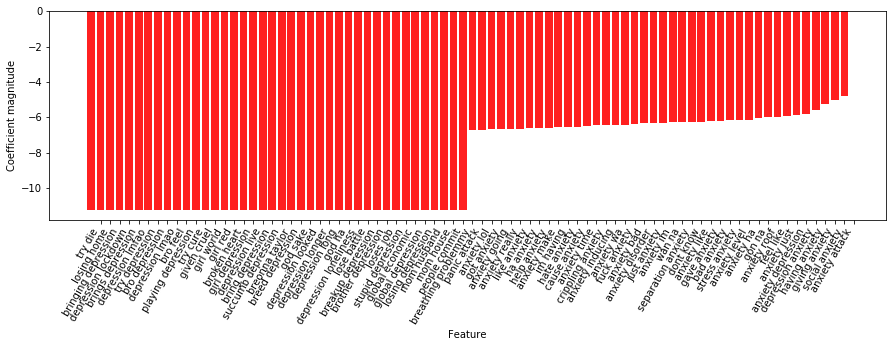

In [14]:
CoefViz(nb_grid)

---

We can also visualize our gridsearch results with a heatmap to see which parameters return the best fit.

---

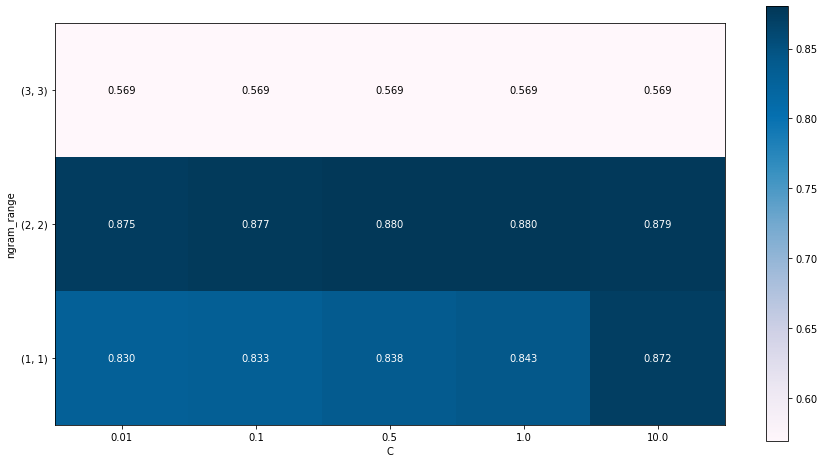

In [15]:
gsHeatmap(nb_grid, nb_param_grid, 'clf__alpha') 

---
Finally, let's fit the model to the test data.

---

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
ModelResults(nb_grid, X_test, y_test)

Test score: 0.89
[[13551  1061]
 [ 2318 12670]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     14612
           1       0.92      0.85      0.88     14988

    accuracy                           0.89     29600
   macro avg       0.89      0.89      0.89     29600
weighted avg       0.89      0.89      0.89     29600



---
The fitted model returned a test score of 89%, with 1061 false positives and 2318 false negatives.

We'll also fit the training data to a logistic regression algorithm, again utilizing a grid search and pipeline to determine the best model parameters.

---

In [18]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr_pipeline = Pipeline([('vect', CountVectorizer(tokenizer = LemmaTokenizer(), 
                             min_df = 5, stop_words = stop_words)), 
                        ('tfidf', TfidfTransformer()),
                        ('clf', LogisticRegression(max_iter = 1000))
                       ])

lr_param_grid = {
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "vect__ngram_range": [(1, 1), (2, 2), (3, 3)]}

lr_grid = GridSearchCV(lr_pipeline, lr_param_grid, cv = 5, n_jobs=-1)

In [55]:
TrainModel(lr_grid, X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Best estimator:
Pipeline(steps=[('vect',
                 CountVectorizer(min_df=5,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
     

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,26.819059,0.781283,6.501444,0.154049,0.01,"(1, 1)","{'clf__C': 0.01, 'vect__ngram_range': (1, 1)}",0.942594,0.945124,0.942735,0.941070,0.939767,0.942258,0.001798,5
1,26.686543,0.272964,6.551151,0.204957,0.01,"(2, 2)","{'clf__C': 0.01, 'vect__ngram_range': (2, 2)}",0.858043,0.861869,0.853544,0.854557,0.862593,0.858121,0.003680,10
2,27.764230,0.577304,7.044224,0.191900,0.01,"(3, 3)","{'clf__C': 0.01, 'vect__ngram_range': (3, 3)}",0.561387,0.562296,0.559907,0.561572,0.562152,0.561463,0.000849,15
3,27.219367,0.250120,6.672378,0.329680,0.1,"(1, 1)","{'clf__C': 0.1, 'vect__ngram_range': (1, 1)}",0.946359,0.949613,0.946427,0.946934,0.946862,0.947239,0.001209,4
4,28.322108,0.160978,6.671528,0.057659,0.1,"(2, 2)","{'clf__C': 0.1, 'vect__ngram_range': (2, 2)}",0.878819,0.879751,0.880403,0.880837,0.879244,0.879811,0.000736,8


---
From the above training results, we can see that the best cv score returned is 95%, using paramters C=10 and 1 ngram.


Again, we'll also visualize the top 40 model coefficients and their associated text. 

---

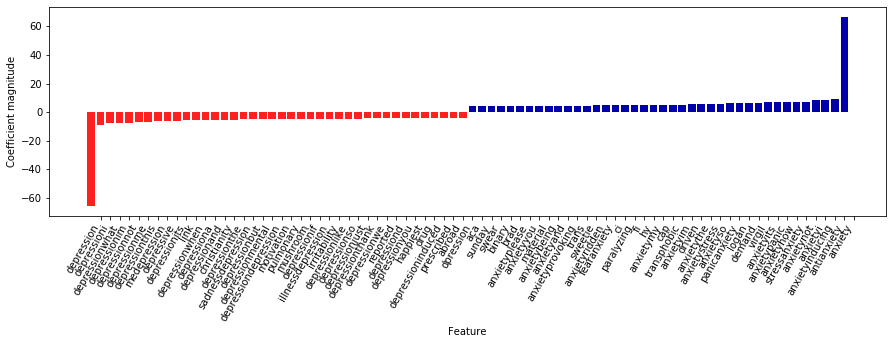

In [21]:
CoefViz(lr_grid)

---
And again, we'll also visualize our grid search results with a heatmap to better see which parameters return the best fit.

---

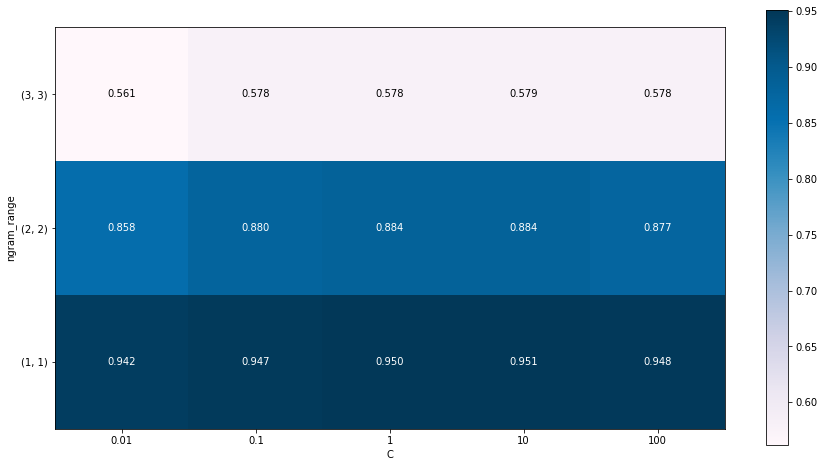

In [22]:
gsHeatmap(lr_grid, lr_param_grid, 'clf__C') 

---
Finally, let's fit the model to the test data.

---

In [24]:
ModelResults(lr_grid, X_test, y_test)

Test score: 0.95
[[13926   686]
 [  698 14290]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14612
           1       0.95      0.95      0.95     14988

    accuracy                           0.95     29600
   macro avg       0.95      0.95      0.95     29600
weighted avg       0.95      0.95      0.95     29600



---
The fitted model returned a test score of 95%, with 686 false positives and 698 false negatives.

### Linear SVC Model
---

In [23]:
from sklearn.svm import LinearSVC

In [57]:
svc_pipeline = Pipeline([('vect', CountVectorizer(tokenizer = LemmaTokenizer(), 
                                                 min_df = 5, stop_words = stop_words)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                    ])

svc_param_grid = {
    "clf__C": [0.001, 0.01, 0.1, 1, 10],
    "vect__ngram_range": [(1, 1), (2, 2), (3, 3)]}

svc_grid = GridSearchCV(svc_pipeline, svc_param_grid, cv = 5, n_jobs=-1)

In [58]:
TrainModel(svc_grid, X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Best estimator:
Pipeline(steps=[('vect',
                 CountVectorizer(min_df=5,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
     

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,24.934362,0.368049,6.058807,0.115450,0.001,"(1, 1)","{'clf__C': 0.001, 'vect__ngram_range': (1, 1)}",0.941871,0.945486,0.942228,0.941287,0.938971,0.941969,0.002093,5
1,25.249168,0.135409,6.199871,0.049391,0.001,"(2, 2)","{'clf__C': 0.001, 'vect__ngram_range': (2, 2)}",0.847039,0.849779,0.841019,0.840151,0.850576,0.845713,0.004357,10
2,25.331824,0.101245,6.119088,0.061446,0.001,"(3, 3)","{'clf__C': 0.001, 'vect__ngram_range': (3, 3)}",0.553858,0.554405,0.552016,0.553464,0.555564,0.553862,0.001162,15
3,24.818905,0.118222,6.217639,0.079277,0.01,"(1, 1)","{'clf__C': 0.01, 'vect__ngram_range': (1, 1)}",0.946214,0.950337,0.945631,0.947513,0.946355,0.947210,0.001678,3
4,26.921247,0.446032,6.334717,0.036321,0.01,"(2, 2)","{'clf__C': 0.01, 'vect__ngram_range': (2, 2)}",0.878457,0.879027,0.880258,0.880547,0.877651,0.879188,0.001088,8


---
From the above training results, we can see the cv score returned is 95% using a C parameter of .1 and 1 ngram.

---

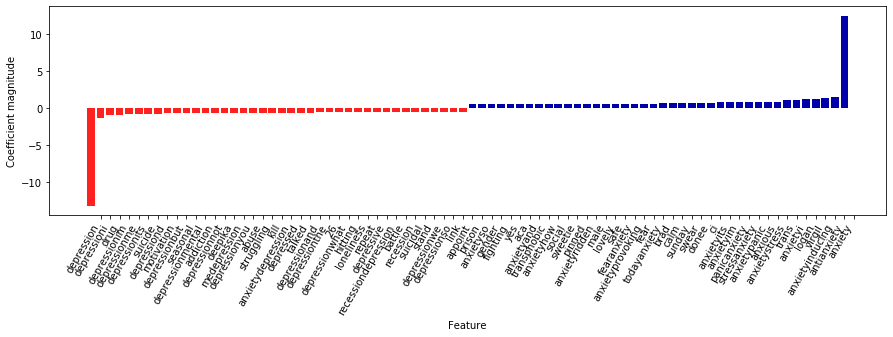

In [27]:
CoefViz(svc_grid)

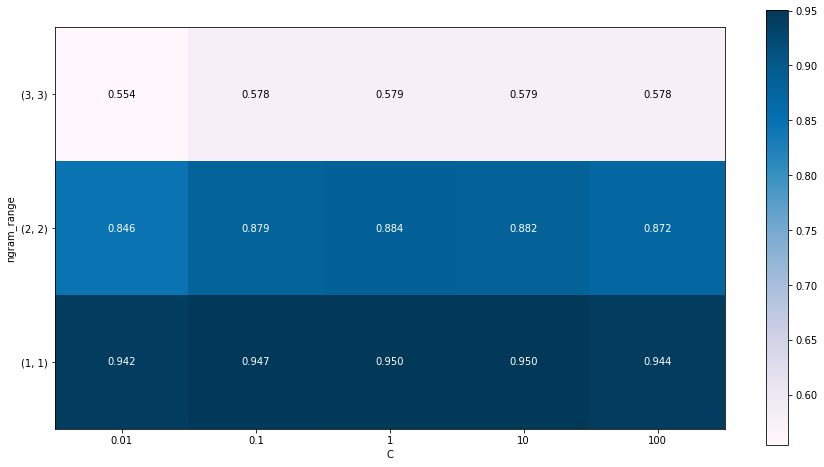

In [28]:
gsHeatmap(svc_grid, lr_param_grid, 'clf__C') 

---
Finally, let's fit the model to the test data.

---

In [29]:
ModelResults(svc_grid, X_test, y_test)

Test score: 0.95
[[14050   562]
 [  835 14153]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14612
           1       0.96      0.94      0.95     14988

    accuracy                           0.95     29600
   macro avg       0.95      0.95      0.95     29600
weighted avg       0.95      0.95      0.95     29600



---
The fitted model returned a test score of 95%, with 562 false positives and 835 false negatives.

Now we'll also fit the training data to a Random Forest ensemble learning (bagging) algorithm, again utilizing a grid search and pipeline to determine the best model parameters.

### Random Forest Model

---

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf_pipeline = Pipeline([('vect', CountVectorizer(tokenizer = LemmaTokenizer(), 
                                                 min_df = 5, stop_words = stop_words)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier()),
                    ])

rf_param_grid = {
    "clf__criterion": ['gini', 'entropy'],
    "vect__ngram_range": [(1, 1), (2, 2), (3, 3)]}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv = 5, n_jobs=-1,)

In [61]:
TrainModel(rf_grid, X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Best estimator:
Pipeline(steps=[('vect',
                 CountVectorizer(min_df=5,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
     

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__criterion,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,77.528672,0.750348,7.069723,0.098605,gini,"(1, 1)","{'clf__criterion': 'gini', 'vect__ngram_range'...",0.967642,0.967639,0.964526,0.965829,0.966264,0.966380,0.001177,1
1,114.339494,3.331102,12.432404,0.176408,gini,"(2, 2)","{'clf__criterion': 'gini', 'vect__ngram_range'...",0.891125,0.893651,0.895823,0.897343,0.892131,0.894014,0.002297,4
2,84.831612,1.406361,15.116535,0.198819,gini,"(3, 3)","{'clf__criterion': 'gini', 'vect__ngram_range'...",0.580208,0.583653,0.578658,0.580106,0.580033,0.580532,0.001661,5
3,77.625080,2.356589,7.576056,0.095025,entropy,"(1, 1)","{'clf__criterion': 'entropy', 'vect__ngram_ran...",0.966990,0.966770,0.965612,0.966046,0.965323,0.966148,0.000644,2
4,124.322706,2.239002,13.492870,0.366844,entropy,"(2, 2)","{'clf__criterion': 'entropy', 'vect__ngram_ran...",0.891559,0.892493,0.896547,0.897126,0.892420,0.894029,0.002323,3


---
From the above training results, we can see that the best cv score returned is 97%, using the gini and 1 ngram parameters.

---

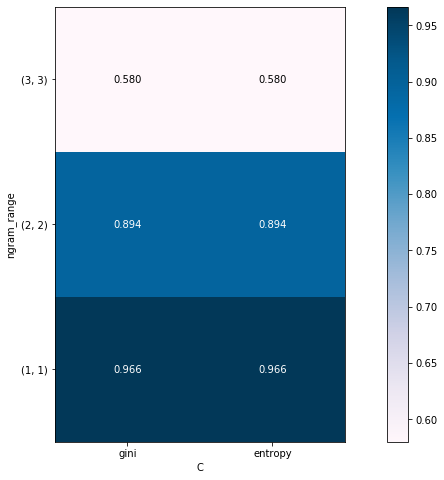

In [33]:
gsHeatmap(rf_grid, rf_param_grid, "clf__criterion")

In [34]:
ModelResults(rf_grid, X_test, y_test)

Test score: 0.97
[[14377   235]
 [  602 14386]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14612
           1       0.98      0.96      0.97     14988

    accuracy                           0.97     29600
   macro avg       0.97      0.97      0.97     29600
weighted avg       0.97      0.97      0.97     29600



---
The fitted model returned a test score of 97%, with 235 false positives and 602 false negatives.

Now we'll also fit the training data to a XGB ensemble learning (boosting) algorithm, again utilizing a grid search and pipeline to determine the best model parameters.

### XGBoost Model
---

In [35]:
import xgboost as xgb

In [36]:
xgb_pipeline = Pipeline([('vect', CountVectorizer(tokenizer = LemmaTokenizer(), 
                                                 min_df = 5, stop_words = stop_words)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', xgb.XGBClassifier()),
                    ])

xgb_param_grid = {
    "clf__subsample": [0.7, 0.8, 0.9],
    "vect__ngram_range": [(1, 1), (2, 2), (3, 3)]}

xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv = 5, n_jobs=-1)

In [37]:
TrainModel(xgb_grid, X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best estimator:
Pipeline(steps=[('vect',
                 CountVectorizer(min_df=5,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                           

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__subsample,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,69.778272,7.617463,9.294424,1.296328,0.7,"(1, 1)","{'clf__subsample': 0.7, 'vect__ngram_range': (...",0.947879,0.951061,0.947948,0.947513,0.952870,0.949454,0.002134,2
1,47.640635,4.917583,7.124934,0.411155,0.7,"(2, 2)","{'clf__subsample': 0.7, 'vect__ngram_range': (...",0.748950,0.750670,0.747774,0.750163,0.746905,0.748892,0.001413,5
2,36.446605,1.929352,9.648827,2.291615,0.7,"(3, 3)","{'clf__subsample': 0.7, 'vect__ngram_range': (...",0.550673,0.550496,0.547383,0.548614,0.549917,0.549416,0.001247,7
3,56.175344,5.808096,8.555709,0.927649,0.8,"(1, 1)","{'clf__subsample': 0.8, 'vect__ngram_range': (...",0.950195,0.951640,0.946644,0.946862,0.950481,0.949165,0.002029,3
4,40.462348,1.922052,7.620048,0.264501,0.8,"(2, 2)","{'clf__subsample': 0.8, 'vect__ngram_range': (...",0.748371,0.750814,0.748136,0.749005,0.748570,0.748979,0.000961,4


---
The training model returns a best cv score of 95% while using subsample parameter of .9 and ngram range of 1 to 1.

---

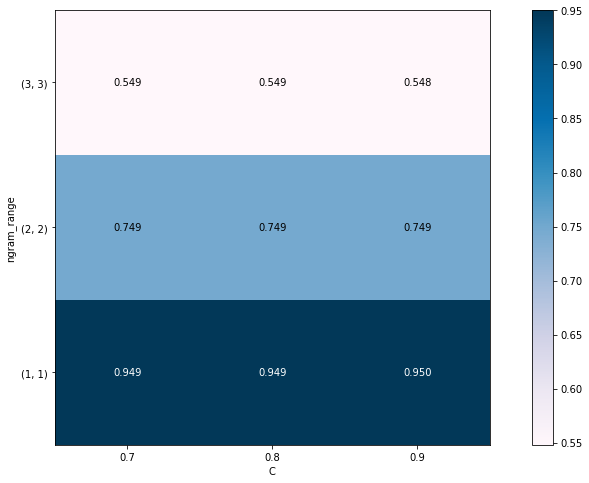

In [39]:
gsHeatmap(xgb_grid, xgb_param_grid, "clf__subsample")

In [40]:
ModelResults(xgb_grid, X_test, y_test)

Test score: 0.95
[[14225   387]
 [ 1094 13894]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14612
           1       0.97      0.93      0.95     14988

    accuracy                           0.95     29600
   macro avg       0.95      0.95      0.95     29600
weighted avg       0.95      0.95      0.95     29600



---
The model returns a test score of 95%, with 387 false positives and 1094 false negatives.


### Model Comparison
---
To compare models easily, we can create a dataframe with each algorithm's results.


In [41]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [53]:
nb_prediction = nb_grid.predict(X_test)

nb_accuracy_metric = accuracy_score(y_test, nb_prediction)
nb_precision = precision_score(y_test, nb_prediction, average = "macro")
nb_recall_metric = recall_score(y_test, nb_prediction, average = "macro")
nb_f1_metric = f1_score(y_test, nb_prediction, average = "macro")

In [56]:
lr_prediction = lr_grid.predict(X_test)

lr_accuracy_metric = accuracy_score(y_test, lr_prediction)
lr_precision = precision_score(y_test, lr_prediction, average = "macro")
lr_recall_metric = recall_score(y_test, lr_prediction, average = "macro")
lr_f1_metric = f1_score(y_test, lr_prediction, average = "macro")

In [62]:
svc_prediction = svc_grid.predict(X_test)

svc_accuracy_metric = accuracy_score(y_test, svc_prediction)
svc_precision = precision_score(y_test, svc_prediction, average = "macro")
svc_recall_metric = recall_score(y_test, svc_prediction, average = "macro")
svc_f1_metric = f1_score(y_test, svc_prediction, average = "macro")

In [64]:
rf_prediction = rf_grid.predict(X_test)

rf_accuracy_metric = accuracy_score(y_test, rf_prediction)
rf_precision = precision_score(y_test, rf_prediction, average = "macro")
rf_recall_metric = recall_score(y_test, rf_prediction, average = "macro")
rf_f1_metric = f1_score(y_test, rf_prediction, average = "macro")

In [65]:
xgb_prediction = xgb_grid.predict(X_test)

xgb_accuracy_metric = accuracy_score(y_test, xgb_prediction)
xgb_precision = precision_score(y_test, xgb_prediction, average = "macro")
xgb_recall_metric = recall_score(y_test, xgb_prediction, average = "macro")
xgb_f1_metric = f1_score(y_test, xgb_prediction, average = "macro")

In [66]:
models_score_df = pd.DataFrame({'naive_bayes':[nb_accuracy_metric,
                                              nb_precision,
                                              nb_recall_metric,
                                              nb_f1_metric],
                                'logistic_regression':[lr_accuracy_metric,
                                              lr_precision,
                                              lr_recall_metric,
                                              lr_f1_metric],
                                'svc':[svc_accuracy_metric,
                                              svc_precision,
                                              svc_recall_metric,
                                              svc_f1_metric],
                                'random_forest':[rf_accuracy_metric,
                                              rf_precision,
                                              rf_recall_metric,
                                              rf_f1_metric],
                                'xgboost':[xgb_accuracy_metric,
                                              xgb_precision,
                                              xgb_recall_metric,
                                              xgb_f1_metric]},
                               
                               index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

models_score_df['best_score'] = models_score_df.idxmax(axis=1)

In [67]:
models_score_df

,naive_bayes,logistic_regression,svc,random_forest,xgboost,best_score
Accuracy,0.885845,0.953243,0.952804,0.972162,0.949966,random_forest
Precision,0.888329,0.953232,0.952855,0.972353,0.950743,random_forest
Recall,0.886366,0.953241,0.952914,0.972330,0.950262,random_forest
F1 Score,0.885743,0.953236,0.952803,0.972162,0.949960,random_forest


---
From the above dataframe, we can see that the random forest model returns the best results for each measurement, with 97.21% accuracy, 97.23% precision, 97.23% recall and an F1 score of 97.21%.

---